<div style="font-size: 30px"><b>Data Sources</b></div>

This project uses the Fetal Health dataset from https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification. 

As required by the data source, we cite the following article

<i>Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318</i>

<div style="font-size: 30px"><b>Project Objectives</b></div>

<div style="font-size: 20px">The dataset contains observation records of Cardiotocogram (CTG) exams which are used to assess fetal health. The health state of each record is assigned by obstetritians into one of three classes: <b>normal</b>, <b>suspect</b> and <b>pathological</b>. The goal of this project is to explore the relationship between the CTG observation features with the health state and develop classification models that infer the latter from exam results.</div>

<div style="font-size: 30px"><b>Feature Details</b></div>

<div style="border: 1px solid lightgrey; padding: 12px" ><div><b>baseline value</b>: Baseline Fetal Heart Rate</div>
<div><b>accelerations</b>: Number of short-term increases in a fetus's heart rate per second</div>
<div><b>fetal_movement</b>: Number of fetal movements per second</div>
<div><b>uterine_contractions</b>: Number of uterine contractions per second</div>
<div style="margin-top: 10px">
For the following 3 variables, note that decelerations are descreases in fetal heart rate.
<div><b>light_decelerations</b>: Number of light decelerations per second</div>
<div><b>severe_decelerations</b>: Number of severe decelerations per second. A servere deceleration is a drop in FHR that's more than 60 beats per minute (bpm) below baseline, lasting at least 60 seconds but less than two minutes</div>
<div><b>prolongued_decelerations</b>: Number of prolongued decelerations per second. A prolongued deceleration is an abnormal drop in the FHR that lasts longer than two minutes but less than 10 minutes</div>
<div><b>abnormal_short_term_variability</b>: Percentage of time with abnormal short term variability. Abnormal short term variability is the oscillation of the FHR around its baseline in amplitude of 5 to 10 beats per minute (bpm) over a 10-minute window. I</div>
<div><b>mean_value_of_short_term_variability</b>: Mean value of short term variability</div>
<div><b>percentage_of_time_with_abnormal_long_term_variability</b>: Percentage of time with abnormal long term variability. Abnormal long term variability refers to irregular fluctuations in amplitude and frequency of a heart rate's baseline over several days, weeks, or months</div>
<div><b>mean_value_of_long_term_variability</b>: Mean value of long term variability</div>
</div>
<div style="margin-top: 10px">
For all histogram related features, the histogram in question is that of the fetal heart rate measurements in the exam.
<div><b>histogram_width</b>: Width of the histogram made using all values from a record</div>
<div><b>histogram_min</b>: Histogram minimum value</div>
<div><b>histogram_max</b>: Histogram maximum value</div>
<div><b>histogram_number_of_peaks</b>: Number of peaks in the exam histogram</div>
<div><b>histogram_number_of_zeroes</b>: Number of zeroes in the exam histogram</div>
<div><b>histogram_mode</b>: Histogram mode</div>
<div><b>histogram_mean</b>: Histogram mean</div>
<div><b>histogram_median</b>: Histogram median</div>
<div><b>histogram_variance</b>: Histogram variance</div>
<div><b>histogram_tendency</b>: Histogram tendency</div>
<div><b>fetal_health</b>: number representing the health class 1 (normal), 2 (suspect) or 3 (pathological) </div>
</div>
</div>

<div style="font-size: 30px"><b>Explorative Data Analysis</b></div>

In [249]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [250]:
health_data = pd.read_csv('fetal_health.csv')

In [251]:
health_data.shape

(2126, 22)

In [252]:
health_data.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [253]:
health_data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


<div style="font-size: 25px"><b>Missing Data</b></div>

In [254]:
health_data.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

There are no missing values in any columns.

<div style="font-size: 25px"><b>Target Variable</b></div>

<div>The target variable is fetal_health which is represented by numeric values (1 for normal, 2 for suspect and 3 for pathological). The first concern is whether we should to view this as a regression problem or classification problem. </div>

<div>
Even though fetal_health is encoded as numeric values, the question we need to ask is, if we view it as the target in a regression problem, do the original classes correspond to varied levels of severity as the numbers represent. For example, does a record being suspect mean that it lies between normal and pathological?
</div>

<div>
Due to this concern, this notebook will treat fetal_health as a categorical variable and will examine the relationships between it and other measures in a classification setting.
</div>

In [255]:
health_state_names = {1: 'Normal', 2: 'Suspect', 3: 'Pathological'}
health_state_names_order = ['Normal', 'Suspect', 'Pathological']
def rename_target(row):
    row['fetal_health_name'] = health_state_names[row['fetal_health']]
    return row

In [256]:
health_data = health_data.apply(rename_target, axis=1)
# health_data['fetal_health_name'] = pd.Categorical(health_data['fetal_health_name'], [1, 2, 3])


In [257]:
health_data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health,fetal_health_name
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0,Suspect
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0,Normal
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0,Normal
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0,Normal
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0,Suspect
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0,Suspect
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0,Suspect
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0,Suspect


<Axes: xlabel='fetal_health_name', ylabel='count'>

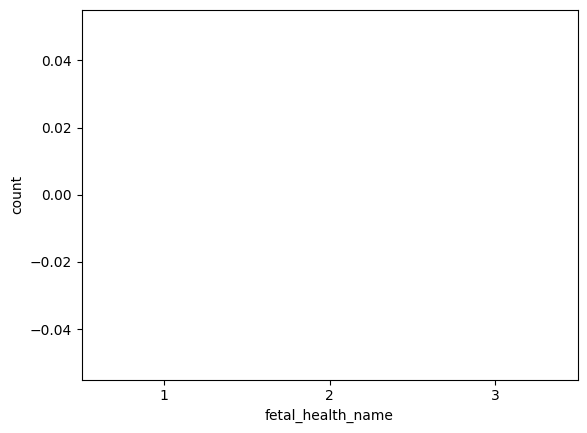

In [234]:
sns.countplot(data= health_data, x="fetal_health_name", alpha=0.5, color='#05b0a3')

<b>We see that the majority of the records have fetal_health normal. Given this imbalance in data, when diagnosing the accuracy of models, we cannot reply solely on the misclarification rate. Instead, we need to look at other measures such as precision and recall to gauge model accuracy.</b>

<div style="font-size: 25px"><b>fetal_movement and uterine_contractions</b></div>


Most of the feature variables are around fetal heart rate. The two exceptions are fetal_movement and uterine_contractions, so we will have a preliminary look at them first.

In [232]:
def get_column_dist_by_fetal_health(col, health_data):
    fig, axes = plt.subplots(2, 2, figsize=(16, 8))
    fig.set_size_inches(12, 6)
    ax1 = axes[0][0]
    sns.barplot(x=col, y='fetal_health_name', data=health_data, color='#4D9DFF', order=health_state_names_order,
                estimator=np.mean, errorbar=None, err_kws={'linewidth': 0}, ax=ax1)
    for p in ax1.patches:
        ax1.annotate(f'{p.get_width():.4f}', (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height()),
                    ha='center', va='center', xytext=(0, 20), textcoords='offset points', fontsize=10, color='black')
    ax1.set_title(f'Mean {col} by fetal_health')
    ax1.set_xlabel(col)
    ax1.set_ylabel('')
    sns.despine(left=True, bottom=True, ax=ax1)
    
    ax2 = axes[0][1]
    sns.violinplot(x=col, y='fetal_health_name', data=health_data, color='#4D9DFF', order=health_state_names_order, ax=ax2)
    ax2.set_title(f'Distribution of {col} by fetal_health')
    ax2.set_ylabel("")
    # plt.yticks([])
    sns.despine(left=True, bottom=True, ax=ax2)

    ax3 = axes[1][0]
    sns.barplot(x=col, y='fetal_health_name', data=health_data, color='#4D9DFF', order=health_state_names_order,
                estimator=np.var, errorbar=None, err_kws={'linewidth': 0}, ax=ax3)
    for p in ax3.patches:
        ax3.annotate(f'{p.get_width():.4f}', (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height()),
                    ha='center', va='center', xytext=(0, 20), textcoords='offset points', fontsize=10, color='black')
    ax3.set_title(f'Variance of {col} by fetal_health')
    ax3.set_xlabel(col)
    ax3.set_ylabel('')
    sns.despine(left=True, bottom=True, ax=ax3)

    ax4 = axes[1][1]
    # sns.boxenplot(x=col, y='fetal_health_name', data=health_data, color='#4D9DFF', ax=ax4)
    sns.boxplot(data=health_data, y='fetal_health_name', x=col, ax=ax4)
    # ax4.set_xlabel(col)
    # ax4.set_ylabel('')
    # sns.despine(left=True, bottom=True, ax=ax4)

    plt.subplots_adjust(hspace = 0.8)

def get_column_description_by_fetal_health(col, health_data):
    return health_data.groupby(['fetal_health', 'fetal_health_name'])[col].agg(['max', 'min', 'mean', 'var']).reset_index().sort_values(by='fetal_health').drop(['fetal_health'], axis=1)

<div style="font-size: 20px"><b>fetal_movement</b></div>


ValueError: List of boxplot statistics and `positions` values must have same the length

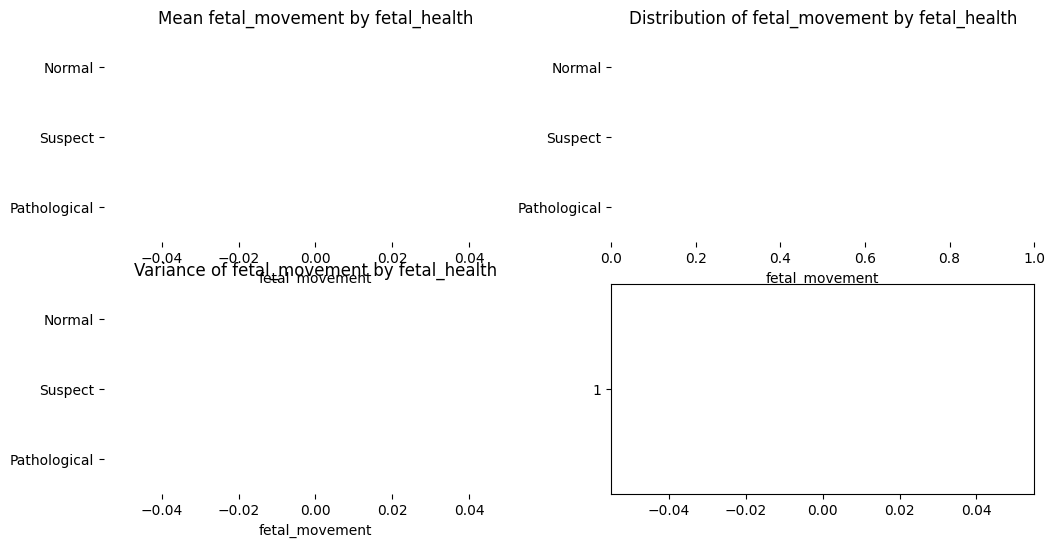

In [233]:
get_column_dist_by_fetal_health('fetal_movement', health_data)

In [ ]:
get_column_description_by_fetal_health('fetal_movement', health_data)

<b>The first plot shows that records with the Pathological class have higher mean fetal_movement. The second plot shows that this is due to a flatter distribution with more high values.</b>

In [ ]:
get_column_dist_by_fetal_health('uterine_contractions', health_data)

In [ ]:
get_column_description_by_fetal_health('uterine_contractions', health_data)

<b>For uterine_contractions, records with the Pathological class also exhibit higher variability and a right skewed distribution. However, records with the Normal class have the highest mean value.</b>

<div style="font-size: 25px"><b>Heart Rate Features</b></div>

health_data_numeric = health_data.drop('fetal_health_name', axis=1)

corr = health_data_numeric.corr(method='pearson')
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='copper_r', cbar=None, linewidth=2, ax=ax)
ax.set_title('Correlation between columns', fontsize=16, fontweight='bold')

We see that the columns that have the highest correlation with fetal_health are 
<div>
<div><b>accelerations</b></div>
<div><b>prolongued_decelerations</b></div>
<div><b>abnormal_short_term_variability</b></div>
<div><b>percentage_of_time_with_abnormal_long_term_variability</b></div>
<div><b>mean_value_of_long_term_variability</b></div>
</div>

We will now examine them individually.

<div style="font-size: 20px"><b>accelerations</b></div>

In [ ]:
get_column_dist_by_fetal_health('accelerations', health_data)

In [ ]:
get_column_description_by_fetal_health('accelerations', health_data)

<b>We see that normal records tend to have much higher acceleration.</b>

The correlation between accelerations and histogram_max is also relatively high (0.39). It may be interesting to look at the relationship of these two variables for different health states.

In [ ]:
def get_lm_plot_by_fetal_health(col1, col2):
    sns.lmplot(data =health_data,x=col1,y=col2, hue="fetal_health_name")
    plt.show()


In [ ]:
get_lm_plot_by_fetal_health('accelerations', 'histogram_max')

<b>The above plot shows that, overall, a greater number of accelerations is associated with a higher heart rate max. However, this effect is more pronounced for suspect and pathological records.</b>

In [ ]:
get_lm_plot_by_fetal_health('accelerations', 'histogram_width')

<b>A higher histogram_width is an indicator of greater variability in the the recorded heart rates in the exam. This plot shows that, with a larger number of accelerations, the heart rate also tends to be more varied.</b>

<div style="font-size: 20px"><b>prolongued_decelerations</b></div>

In [ ]:
get_column_dist_by_fetal_health('prolongued_decelerations', health_data)

In [ ]:
get_column_description_by_fetal_health('prolongued_decelerations', health_data)

<b>We see that records that are classified as pathological tend have a substantially higher mean prolongued_decelerations. </b>

Notice also the high correlation between prolongued_decelerations and histogram_width, which is an indicator of variability in observerd heart rate.

In [ ]:
get_lm_plot_by_fetal_health('prolongued_decelerations', 'histogram_width')

However, as the above plot shows, the relationship between these two measures are roughly the same for different classes.

<div style="font-size: 20px"><b>abnormal_short_term_variability</b></div>

In [ ]:
get_column_dist_by_fetal_health('abnormal_short_term_variability', health_data)

In [ ]:
get_column_description_by_fetal_health('abnormal_short_term_variability', health_data)

<b>For records that are classified as suspect or pathological, abnormal_short_term_variability values tend to be higher on average and with lower variance. On the other hand, for normal records, the values show more variability while lying in a much lower range.</b>

<div style="font-size: 20px"><b>percentage_of_time_with_abnormal_long_term_variability</b></div>

In [ ]:
get_column_dist_by_fetal_health('percentage_of_time_with_abnormal_long_term_variability', health_data)

In [ ]:
get_column_description_by_fetal_health('percentage_of_time_with_abnormal_long_term_variability', health_data)

<b>We see that normal records have much lower abnormal long term variability. Records that are classified as pathological have higher values on average and the percentages also exhibit more variability</b>

Due to the similarity between what the columns percentage_of_time_with_abnormal_long_term_variability and abnormal_short_term_variability measure, we expect a high correlation between them.

In [ ]:
get_lm_plot_by_fetal_health('percentage_of_time_with_abnormal_long_term_variability', 'abnormal_short_term_variability')

The relationship seems to be same for all classes. We can consider dropping one of the columns when developing models that are affected by the existence of highly correlated columns such linear regression.

<div style="font-size: 20px"><b>mean_value_of_long_term_variability</b></div>

In [ ]:
get_column_dist_by_fetal_health('mean_value_of_long_term_variability', health_data)

In [ ]:
get_column_description_by_fetal_health('mean_value_of_long_term_variability', health_data)

<b>We see that pathological records have a much lower average of long term variabilities. It also is interesting to note that, in contrast to percentage_of_time_with_abnormal_long_term_variability, normal records show a higher variability overall than the other two classes.</b>

In [ ]:
sns.boxplot(data=health_data, y='fetal_health_name', x='fetal_movement')